In [31]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
import math


In [32]:
Hv = [50, -50, -100, 100, -150, 150, -200, 200, -250, 250, -300, 300 ]
Center = [1541, 1551, 1588, 1641, 1591, 1665, 1593, 1669, 1580, 1672, 1582, 1672 ]
Fwhm = [21.91, 20.04, 11.24, 14.87, 9.969, 13.11, 9.120, 10.93, 7.857, 12.10, 6.804, 8.845 ]
Resolution = np.array(Fwhm)/np.array(Center)


<ErrorbarContainer object of 3 artists>

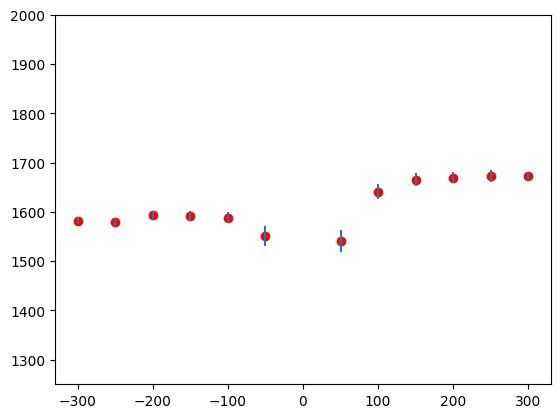

In [33]:
plt.scatter(Hv,Center, c = 'red')
plt.ylim(1250,2000)
plt.errorbar(Hv,Center,Fwhm,  linestyle='None')

[0.01421804 0.0129207  0.00707809 0.00906155 0.00626587 0.00787387
 0.00572505 0.00654883 0.00497278 0.00723684 0.00430088 0.00529007]


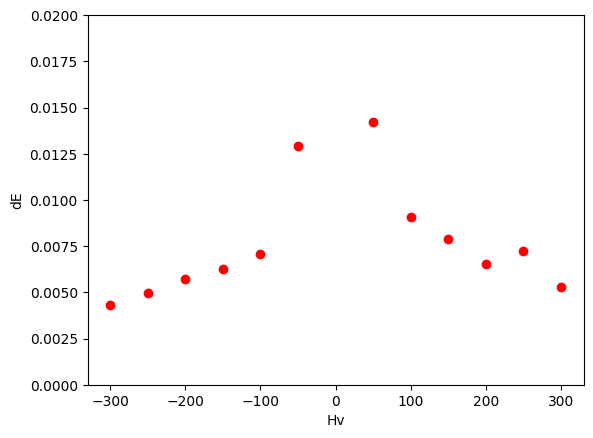

In [34]:
plt.scatter(Hv,Resolution, c = 'red')
plt.ylabel('dE')
plt.xlabel('Hv')
plt.ylim(0,0.02)
print(Resolution)

In [35]:
#Calibrazione MCA in energia

In [36]:
Canale = np.array([1496.09, 1595.22, 1690.23])
delta = np.array([7.85, 7.04, 7.95])
Energie = np.array([5.157, 5.486, 5.805])

In [37]:
def retta(x,a,b):
    return a*x + b

In [38]:
x = np.linspace(0,1800,400)


0.003337660782439549


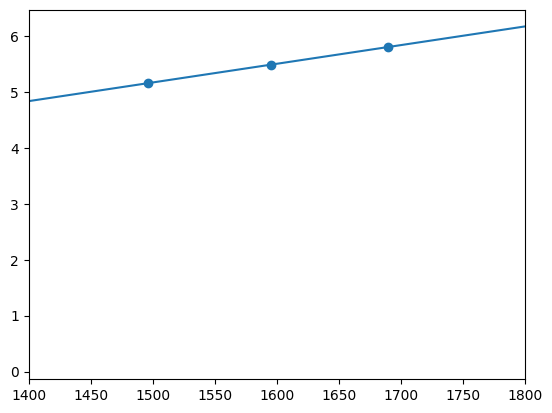

In [39]:
plt.scatter(Canale,Energie)
popt, pcov = opt.curve_fit(retta,Canale,Energie)
plt.plot(x, retta(x,popt[0], popt[1]))
plt.xlim(1400,1800)
print(popt[0])
plt.show()

In [40]:
Resolution_Am = delta/Canale
print(Resolution_Am)


[0.00524701 0.00441318 0.0047035 ]


In [41]:
print(popt[0])
print(popt[1])

0.003337660782439549
0.16294715411145708


In [42]:
#Picco Cesio 137 (aumento del gain di un fattore 5)
Energia_Cesio = popt[0]*876.40/5 + popt[1]
print(Energia_Cesio)

0.7479723360574613


In [43]:
Res_Pu = Resolution_Am[0]*5.157
print(Res_Pu)

0.027058833358955682


In [44]:
from scipy.optimize import curve_fit

In [45]:
Mca = np.linspace(0,2048,2048)
def gaussiana(x, a, mu, sigma):
    return a * np.exp(-((x - mu)**2) / (2 * sigma**2))

In [46]:
import pandas as pd
import numpy as np
import scipy.stats as st
import landaupy

def leggi_da_excel(file_excel, foglio_excel):
    # Leggi i dati dal foglio Excel
    dati_excel = pd.read_excel(file_excel, sheet_name=foglio_excel)
    
    # Converti i dati in una matrice (lista di liste)
    matrice_dati = dati_excel.values.tolist()
    
    return matrice_dati

# Percorso del file Excel
file_excel = r"Plutonio.xlsx"
# Nome del foglio Excel da cui leggere i dati
foglio_excel = "Foglio1"

# Chiamata alla funzione per leggere i dati e metterli in una matrice
matrice_dati = leggi_da_excel(file_excel, foglio_excel)

# Stampare la matrice per verificare che i dati siano stati letti correttamente
print(matrice_dati)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 21, 24, 15, 16, 19, 18, 20, 12, 19, 19, 18, 15, 18, 15, 27, 26, 15, 15, 22, 16, 16, 22, 20, 22, 19, 24, 19, 22, 17, 19, 16, 21, 16, 14, 38, 10, 22, 20, 12, 18, 18, 22, 11, 14, 12, 23, 23, 18, 24, 10, 22, 16, 10, 22, 20, 19, 10, 19, 19, 19, 22, 17, 25, 23, 16, 12, 23, 20, 25, 14, 20, 21, 18, 16, 20, 17, 9, 16, 15, 15, 24, 15, 24, 15, 20, 14, 15, 10, 15, 18, 14, 24, 5, 19, 17, 16, 25, 18, 19, 18, 13, 13, 14, 22, 24, 10, 21, 23, 13, 27, 15, 18, 8, 13, 13, 14, 21, 13, 11, 14, 16, 9, 13, 14, 13, 13, 10, 21, 17, 16, 13, 17, 9, 17, 10, 14, 13, 13, 11, 9, 19, 19, 14, 12, 7, 7, 10, 13, 13, 14, 14, 16, 11, 12, 13, 13, 12, 8, 11, 14, 9, 13, 10, 15, 17, 17, 24, 13, 13, 8, 12, 10, 11, 6, 14, 11, 15, 10, 13, 16, 15, 10, 14, 14, 9, 11, 14, 14, 6, 15, 10, 14, 1

(1550.0, 1650.0)

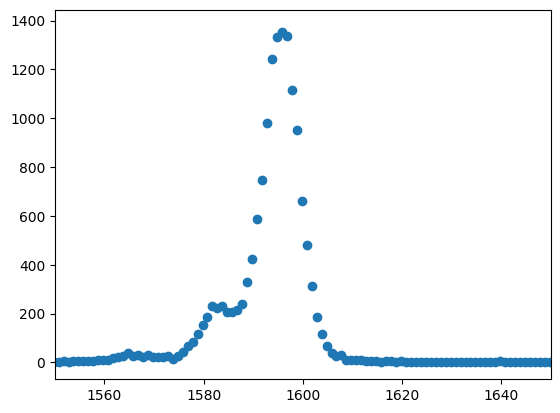

In [47]:
plt.scatter(Mca,matrice_dati[0])
plt.xlim(1550,1650)

In [48]:
y = np.array(matrice_dati[0])
x_min = 1550
x_max = 1650
mask = (Mca >= x_min) & (Mca <= x_max)
x_fit = Mca[mask]
y_fit = y[mask]
p0 = np.array([1400,1590,7])
popt, pcov = curve_fit(gaussiana,x_fit,y_fit,p0)

1595.4679832411794
3.84860412050855


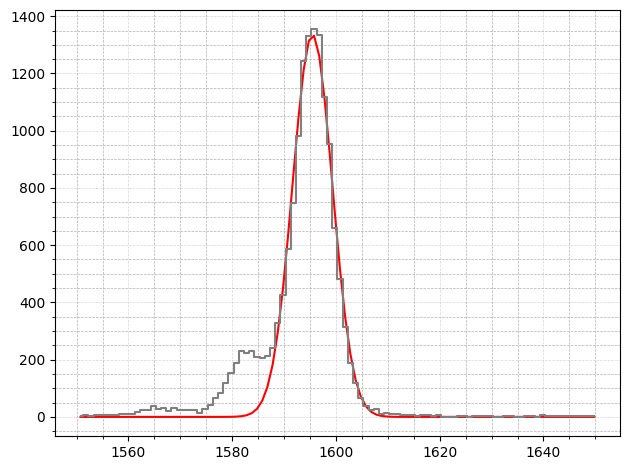

In [49]:
plt.plot(x_fit,gaussiana(x_fit,popt[0],popt[1],popt[2]), c='red')
#plt.scatter(x_fit,y_fit)
print(popt[1])
print(popt[2])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.plot(x_fit, y_fit, drawstyle='steps-mid', color='gray', label='Spettro $^{22}$Na')

(1450.0, 1550.0)

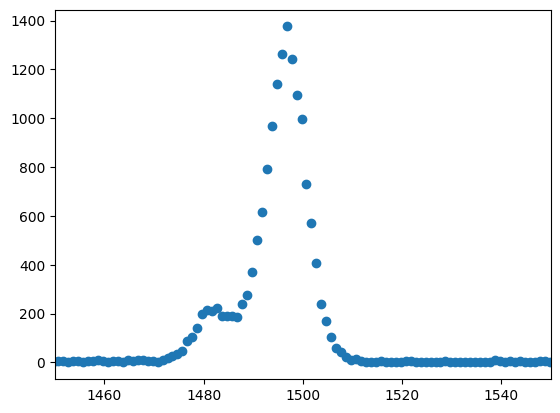

In [50]:
plt.scatter(Mca,matrice_dati[0])
plt.xlim(1450,1550)

In [51]:
y = np.array(matrice_dati[0])
x_min = 1450
x_max = 1550
mask = (Mca >= x_min) & (Mca <= x_max)
x_fit = Mca[mask]
y_fit = y[mask]
p0 = np.array([1400,1490,7])
popt, pcov = curve_fit(gaussiana,x_fit,y_fit,p0)

1496.468415389322
4.264843860606866


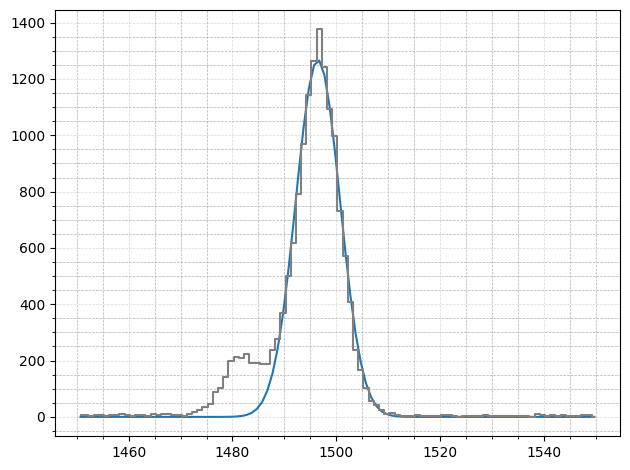

In [52]:
plt.plot(x_fit,gaussiana(x_fit,popt[0],popt[1],popt[2]))
#plt.scatter(x_fit,y_fit)
print(popt[1])
print(popt[2])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.plot(x_fit, y_fit, drawstyle='steps-mid', color='gray', label='Spettro $^{22}$Na')

(1650.0, 1750.0)

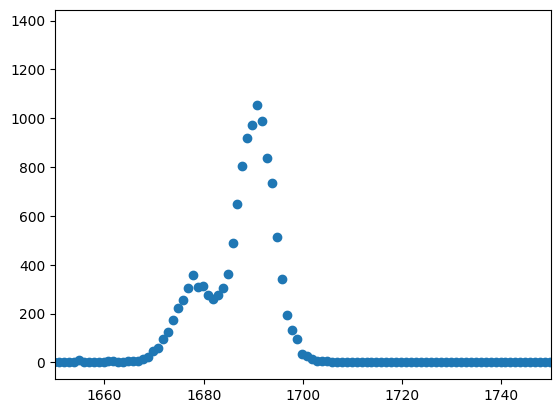

In [53]:
plt.scatter(Mca,matrice_dati[0])
plt.xlim(1650,1750)

In [54]:
y = np.array(matrice_dati[0])
x_min = 1650
x_max = 1750
mask = (Mca >= x_min) & (Mca <= x_max)
x_fit = Mca[mask]
y_fit = y[mask]
p0 = np.array([1400,1690,7])
popt, pcov = curve_fit(gaussiana,x_fit,y_fit,p0)

1690.066114813647
4.441004965785986


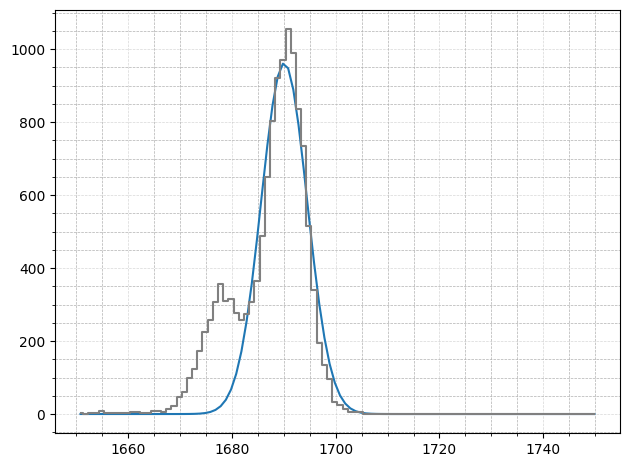

In [55]:
plt.plot(x_fit,gaussiana(x_fit,popt[0],popt[1],popt[2]))
#plt.scatter(x_fit,y_fit)
print(popt[1])
print(popt[2])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.plot(x_fit, y_fit, drawstyle='steps-mid', color='gray', label='Spettro $^{22}$Na')

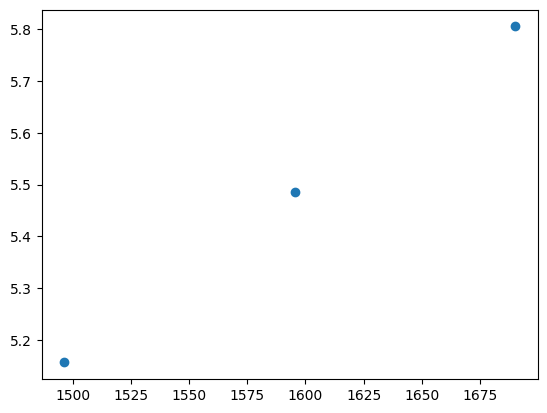

In [56]:
Canali = np.array([1496.46, 1595.46, 1690.06])
plt.scatter(Canali,Energie)

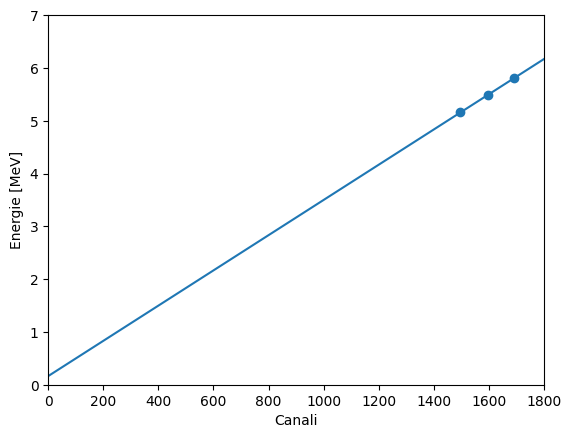

The function is the type Energy = Channel*a + b
parameter a for the line is = 0.003337660782439549
parameter b for the line is = 0.16294715411145708
error on parameter a is = 1.1155529986119958e-05
error on parameter b is = 0.0178021747573994


In [59]:
plt.scatter(Canale, Energie)
popt, pcov = opt.curve_fit(retta, Canale, Energie)
plt.plot(x, retta(x, popt[0], popt[1]))
#plt.xlim(min(Canale) - 50, max(Canale) + 50)
#plt.ylim(min(Energie)- 0.5, max(Energie)+0.5)
plt.xlim(0,1800)
plt.xlabel('Canali')
plt.ylabel('Energie [MeV]')
plt.ylim(0,7)
plt.show()
error_a = math.sqrt(pcov[0][0])
error_b = math.sqrt(pcov[1][1])
print('The function is the type Energy = Channel*a + b')
print('parameter a for the line is =', popt[0])
print('parameter b for the line is =', popt[1])
print('error on parameter a is =', error_a)
print('error on parameter b is =', error_b)